<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Feature_Selection_and_Predictive_Modelling_with_Weather_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

train_data=pd.read_csv("/content/drive/My Drive/train_data_with_weather_2015.csv")
test_data=pd.read_csv("/content/drive/My Drive/test_data_with_weather_2015.csv")

In [3]:
print(train_data.OUTCOME.mean(),test_data.OUTCOME.mean())

0.5 0.3042416430008652


In [0]:
train_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,temperature,humidity,wind_speed,pressure,wind_direction,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,OUTCOME
0,2015.0,5.000000,22.000000,5.000000,0.254655,0.257109,821.000000,822.000000,0.174887,830.000000,832.000000,2.000000,69.000000,70.000000,16.000000,838.000000,250.000000,0.0,46.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,290.470333,65.000000,3.000000,1032.000000,346.000000,69.00000,351.000000,190.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,22.000000,8.0,21.000000,8.0,30.000000,8.000000,38.000000,0
1,2015.0,8.000000,29.000000,6.000000,0.308900,0.285001,5.000000,2358.000000,0.078960,808.000000,741.000000,-27.000000,303.000000,283.000000,15.000000,13.000000,2296.000000,0.0,263.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,295.501763,66.000000,4.000000,1023.000000,275.000000,27.00000,14.000000,2028.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.000000,58.000000,0.0,5.000000,8.0,8.000000,0.000000,13.000000,0
2,2015.0,9.000000,22.000000,2.000000,0.254655,0.297450,907.000000,912.000000,0.275508,1117.000000,1106.000000,-11.000000,130.000000,114.000000,10.000000,922.000000,794.000000,0.0,100.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,292.250000,88.000000,3.000000,1017.000000,30.000000,69.00000,343.000000,180.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,12.000000,9.0,7.000000,11.0,17.000000,9.000000,22.000000,0
3,2015.0,4.000000,16.000000,4.000000,0.336164,0.289338,1415.000000,1423.000000,0.376994,1704.000000,1721.000000,17.000000,109.000000,118.000000,27.000000,1450.000000,578.000000,0.0,88.000000,9.000000,0.0,8.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,279.088667,86.000000,3.000000,1033.000000,58.000000,115.00000,430.000000,1554.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,23.000000,14.0,15.000000,17.0,4.000000,14.000000,50.000000,1
4,2015.0,1.000000,31.000000,6.000000,0.336164,0.327223,1620.000000,1617.000000,0.099516,1905.000000,1847.000000,-18.000000,285.000000,270.000000,13.000000,1630.000000,1846.000000,0.0,251.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,270.075667,100.000000,4.000000,1038.000000,239.000000,270.00000,1095.000000,1626.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.000000,17.000000,16.0,20.000000,19.0,5.000000,16.000000,30.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350795,2015.0,1.506379,22.948966,3.012758,0.254655,0.277645,1344.974483,1343.987242,0.132491,1439.493621,1448.455346,8.961725,114.519138,124.468104,17.000000,1400.987242,591.000000,0.0,102.961725,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,268.289824,66.366037,3.012758,1035.595688,303.748789,69.00000,286.000000,121.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,43.987242,13.0,44.974483,14.0,39.493621,14.000000,0.987242,1
3350796,2015.0,11.000000,6.831457,1.000000,0.328222,0.315

In [0]:
test_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,temperature,humidity,wind_speed,pressure,wind_direction,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,OUTCOME
0,2015,9,28,1,0.254655,0.327277,1725,1722.0,0.099516,1832,1913.0,41.0,127.0,171.0,29.0,1751.0,689,0,136.0,41.0,0.0,0.0,0.0,0.0,0,0,0,0,0,295.420000,88.0,1.0,1017.0,50.0,99,440,101,0,0,0,0,1,0,0,0,0,0,0,0,0,0,17:22:00,17:25:00,18:32:00,17:51:00,17,22,17,25,18,32,17,51,1
1,2015,12,17,4,0.328222,0.302174,1110,1120.0,0.455724,1222,1237.0,15.0,72.0,77.0,32.0,1152.0,236,0,40.0,5.0,0.0,0.0,10.0,0.0,0,0,0,0,0,275.140522,57.0,1.0,1029.0,27.0,82,276,1087,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11:20:00,11:10:00,12:22:00,11:52:00,11,20,11,10,12,22,11,52,1
2,2015,4,19,7,0.283660,0.277645,1545,1550.0,0.275508,1710,1708.0,-2.0,85.0,78.0,10.0,1600.0,395,0,63.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,291.892000,92.0,3.0,1019.0,180.0,277,1144,220,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15:50:00,15:45:00,17:10:00,16:00:00,15,50,15,45,17,10,16,0,0
3,2015,11,18,3,0.336164,0.268674,1950,1946.0,0.092683,2229,2224.0,-5.0,279.0,278.0,23.0,2009.0,1739,0,250.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,288.610673,62.0,10.0,998.0,204.0,228,969,1602,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19:46:00,19:50:00,22:29:00,20:09:00,19,46,19,50,22,29,20,9,0
4,2015,1,24,6,0.254655,0.269565,1400,1351.0,0.070576,1546,1550.0,4.0,106.0,119.0,31.0,1422.0,534,0,80.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,277.037667,95.0,5.0,1025.0,306.0,99,439,100,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13:51:00,14:00:00,15:46:00,14:22:00,13,51,14,0,15,46,14,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802137,2015,10,15,4,0.336164,0.336873,931,925.0,0.080515,1139,1129.0,-10.0,188.0,184.0,20.0,945.0,1118,0,158.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,281.810000,61.0,3.0,1016.0,240.0,228,903,1487,0,0,0,0,0,0,0,0,0,0,1,0,0,0,09:25:00,09:31:00,11:39:00,09:45:00,9,25,9,31,11,39,9,45,0
802138,2015,10,24,6,0.328222,0.407928,940,931.0,0.070576,1240,1219.0,-21.0,360.0,348.0,9.0,940.0,2556,0,335.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,283.930000,64.0,0.0,1027.0,21.0,144,583,1077,0,0,0,0,0,0,1,0,0,0,0,0,0,0,09:31:00,09:40:00,12:40:00,09:40:00,9,31,9,40,12,40,9,40,0
802139,2015,6,3,3,0.331816,0.341802,1003,1003.0,0.154482,1314,1304.0,-10.0,131.0,121.0,14.0,1017.0,775,0,101.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,280.991333,45.0,2.0,1021.0,262.0,216,908,432,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10:03:00,10:03:00,13:14:00,10:17:00,10,3,10,3,13,14,10,17,0
802140,2015,3,23,1,0.308362,0.279126,2150,2150.0,0.154482,2325,2303.0,-22.0,95.0,73.0,18.0,2208.0,301,0,53.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,273.539500,74.0,2.0,1037.0,322.0,55,147,912,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21:50:00,21:50:00,23:25:00,22:08:00,21,50,21,50,23,25,22,8,0


In [0]:
drop_cols=['SCHEDULED_DEPARTURE','DEPARTURE_TIME']
init_cols=['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'AIR_TIME', 'DIVERTED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing','temperature','humidity','wind_speed','wind_direction','pressure']
Y_train=pd.DataFrame(train_data['OUTCOME'])
X_train=train_data[init_cols]

Y_test=pd.DataFrame(test_data['OUTCOME'])
X_test=test_data[init_cols]

In [0]:
X_train

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,temperature,humidity,wind_speed,wind_direction,pressure
0,2015.0,5.000000,22.000000,5.000000,0.254655,0.257109,0.174887,16.000000,69.000000,250.000000,46.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,69.00000,351.000000,190.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.0,8.0,22.000000,21.000000,30.000000,8.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,290.470333,65.000000,3.000000,346.000000,1032.000000
1,2015.0,8.000000,29.000000,6.000000,0.308900,0.285001,0.078960,15.000000,303.000000,2296.000000,263.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,27.00000,14.000000,2028.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.000000,0.0,8.0,58.000000,5.000000,8.000000,0.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,295.501763,66.000000,4.000000,275.000000,1023.000000
2,2015.0,9.000000,22.000000,2.000000,0.254655,0.297450,0.275508,10.000000,130.000000,794.000000,100.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,69.00000,343.000000,180.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,9.0,11.0,12.000000,7.000000,17.000000,9.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,292.250000,88.000000,3.000000,30.000000,1017.000000
3,2015.0,4.000000,16.000000,4.000000,0.336164,0.289338,0.376994,27.000000,109.000000,578.000000,88.000000,0.0,9.000000,0.0,8.000000,0.000000,0.0,115.00000,430.000000,1554.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,14.0,17.0,23.000000,15.000000,4.000000,14.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,279.088667,86.000000,3.000000,58.000000,1033.000000
4,2015.0,1.000000,31.000000,6.000000,0.336164,0.327223,0.099516,13.000000,285.000000,1846.000000,251.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,270.00000,1095.000000,1626.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.000000,16.0,19.0,17.000000,20.000000,5.000000,16.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,270.075667,100.000000,4.000000,239.000000,1038.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350795,2015.0,1.506379,22.948966,3.012758,0.254655,0.277645,0.132491,17.000000,114.519138,591.000000,102.961725,0.0,0.000000,0.0,0.000000,0.000000,0.0,69.00000,286.000000,121.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,13.0,14.0,43.987242,44.974483,39.493621,14.000000,0.987242,1.000000,1.000000,1.000000,1.000000,1.000000,268.289824,66.366037,3.012758,303.748789,1035.595688
3350796,2015.0,11.000000,6.831457,1.000000,0.328222,0.315815,0.243565,22.619584,293.929375,2342.000000,257.646877,0.0,1.548959,0.0,0.000000,3.407710,0.0,13.00000,44.000000,1093.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,8.0,28.070625,25.353123,19.282498,0.000000,50.690208,0.690208,0.690208,0.690208,0.690208,0.690208,296.870758,54.054587,3.690208,242.423748,1014.000000
3350797,2015.0,7.578120,4.375042,5.296866,0.293531,0.262450,1.000000,13.562507,72.187465,377.937214,52.171852,0.0,0.984387,0.0,0.000000,341.578120,0.0,277.42188,1130.156351,237.656630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.140627,17.0,18.0,51.656184,14.218802,

In [0]:
X_train[:2406600]

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,temperature,humidity,wind_speed,wind_direction,pressure
0,2015.0,5.0,22.0,5.0,0.254655,0.257109,0.174887,16.0,69.0,250.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,351.0,190.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,22.0,21.0,30.0,8.0,38.0,1.0,1.0,1.0,1.0,1.0,290.470333,65.0,3.0,346.0,1032.0
1,2015.0,8.0,29.0,6.0,0.308900,0.285001,0.078960,15.0,303.0,2296.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,14.0,2028.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,8.0,58.0,5.0,8.0,0.0,13.0,1.0,1.0,1.0,1.0,1.0,295.501763,66.0,4.0,275.0,1023.0
2,2015.0,9.0,22.0,2.0,0.254655,0.297450,0.275508,10.0,130.0,794.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,343.0,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,11.0,12.0,7.0,17.0,9.0,22.0,1.0,1.0,1.0,1.0,1.0,292.250000,88.0,3.0,30.0,1017.0
3,2015.0,4.0,16.0,4.0,0.336164,0.289338,0.376994,27.0,109.0,578.0,88.0,0.0,9.0,0.0,8.0,0.0,0.0,115.0,430.0,1554.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,17.0,23.0,15.0,4.0,14.0,50.0,0.0,0.0,0.0,0.0,0.0,279.088667,86.0,3.0,58.0,1033.0
4,2015.0,1.0,31.0,6.0,0.336164,0.327223,0.099516,13.0,285.0,1846.0,251.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,1095.0,1626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,16.0,19.0,17.0,20.0,5.0,16.0,30.0,1.0,1.0,1.0,1.0,1.0,270.075667,100.0,4.0,239.0,1038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406595,2015.0,10.0,4.0,7.0,0.297972,0.347496,0.128038,12.0,165.0,954.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,277.0,1978.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,15.0,54.0,55.0,40.0,13.0,6.0,1.0,1.0,1.0,1.0,1.0,282.650000,62.0,5.0,40.0,1016.0
2406596,2015.0,4.0,6.0,1.0,0.267691,0.327277,0.109931,21.0,194.0,1075.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,941.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,8.0,53.0,55.0,9.0,6.0,14.0,1.0,1.0,1.0,1.0,1.0,277.259667,76.0,4.0,111.0,1034.0
2406597,2015.0,1.0,24.0,6.0,0.308900,0.298923,0.084287,22.0,47.0,77.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,210.0,837.0,2059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,22.0,23.0,28.0,33.0,20.0,22.0,50.0,1.0,1.0,1.0,1.0,1.0,289.166667,79.0,2.0,50.0,1034.0
2406598,2015.0,3.0,11.0,3.0,0.308362,0.332620,0.072696,16.0,192.0,1069.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,250.0,925.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,10.0,52.0,0.0,12.0,7.0,8.0,1.0,1.0,1.0,1.0,1.0,278.351000,97.0,2.0,241.0,1015.0


In [0]:
Y_train

,OUTCOME
0,0
1,0
2,0
3,1
4,0
...,...
3350795,1
3350796,1
3350797,1
3350798,1


In [0]:
X_test

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,temperature,humidity,wind_speed,wind_direction,pressure
0,2015,9,28,1,0.254655,0.327277,0.099516,29.0,127.0,689,136.0,0,41.0,0.0,0.0,0.0,0.0,99,440,101,0,0,0,0,1,0,0,0,0,0,0,0,0,0,17,17,18,22,25,32,17,51,0,0,0,0,0,295.420000,88.0,1.0,50.0,1017.0
1,2015,12,17,4,0.328222,0.302174,0.455724,32.0,72.0,236,40.0,0,5.0,0.0,0.0,10.0,0.0,82,276,1087,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,12,20,10,22,11,52,0,0,0,0,0,275.140522,57.0,1.0,27.0,1029.0
2,2015,4,19,7,0.283660,0.277645,0.275508,10.0,85.0,395,63.0,0,0.0,0.0,0.0,0.0,0.0,277,1144,220,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,15,17,50,45,10,16,0,1,1,1,1,1,291.892000,92.0,3.0,180.0,1019.0
3,2015,11,18,3,0.336164,0.268674,0.092683,23.0,279.0,1739,250.0,0,0.0,0.0,0.0,0.0,0.0,228,969,1602,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19,19,22,46,50,29,20,9,1,1,1,1,1,288.610673,62.0,10.0,204.0,998.0
4,2015,1,24,6,0.254655,0.269565,0.070576,31.0,106.0,534,80.0,0,0.0,0.0,0.0,0.0,0.0,99,439,100,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,14,15,51,0,46,14,22,1,1,1,1,1,277.037667,95.0,5.0,306.0,1025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802137,2015,10,15,4,0.336164,0.336873,0.080515,20.0,188.0,1118,158.0,0,0.0,0.0,0.0,0.0,0.0,228,903,1487,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,9,11,25,31,39,9,45,1,1,1,1,1,281.810000,61.0,3.0,240.0,1016.0
802138,2015,10,24,6,0.328222,0.407928,0.070576,9.0,360.0,2556,335.0,0,0.0,0.0,0.0,0.0,0.0,144,583,1077,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,9,12,31,40,40,9,40,1,1,1,1,1,283.930000,64.0,0.0,21.0,1027.0
802139,2015,6,3,3,0.331816,0.341802,0.154482,14.0,131.0,775,101.0,0,0.0,0.0,0.0,0.0,0.0,216,908,432,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,10,13,3,3,14,10,17,1,1,1,1,1,280.991333,45.0,2.0,262.0,1021.0
802140,2015,3,23,1,0.308362,0.279126,0.154482,18.0,95.0,301,53.0,0,0.0,0.0,0.0,0.0,0.0,55,147,912,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21,21,23,50,50,25,22,8,1,1,1,1,1,273.539500,74.0,2.0,322.0,1037.0


In [0]:
Y_test

,OUTCOME
0,1
1,1
2,0
3,0
4,0
...,...
802137,0
802138,0
802139,0
802140,0


In [0]:
####Unused as it would be used for regression problems
from sklearn.feature_selection import SelectPercentile, f_regression                      
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n,s in zip(Unhandled_data.feature_names,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s " % (s,n))
Selector_f.get_support(True)

In [0]:
X_train.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'AIR_TIME', 'DIVERTED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing',
       'temperature', 'humidity', 'wind_speed', 'wind_direction', 'pressure'],
      dtype='object')

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 11172.31t for feature MONTH
F-score: 412.38t for feature DAY
F-score: 925.27t for feature DAY_OF_WEEK
F-score: 19959.62t for feature ORIGIN_AIRPORT
F-score: 16025.41t for feature DESTINATION_AIRPORT
F-score: 2883925.81t for feature DEPARTURE_DELAY
F-score: 264740.81t for feature TAXI_OUT
F-score: 33.57t for feature SCHEDULED_TIME
F-score: 20.21t for feature DISTANCE
F-score: 2815.93t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 248117.44t for feature AIR_SYSTEM_DELAY
F-score: 1616.56t for feature SECURITY_DELAY
F-score: 191010.50t for feature AIRLINE_DELAY
F-score: 285923.89t for feature LATE_AIRCRAFT_DELAY
F-score: 21812.68t for feature WEATHER_DELAY
F-score: 8267.40t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8874.31t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 533.54t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 341.90t for feature AA
F-score: 1586.34t for feature AS
F-score: 596.83t for feature B6
F-score:

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 11172.31t for feature MONTH
F-score: 412.38t for feature DAY
F-score: 925.27t for feature DAY_OF_WEEK
F-score: 19959.62t for feature ORIGIN_AIRPORT
F-score: 16025.41t for feature DESTINATION_AIRPORT
F-score: 2883925.81t for feature DEPARTURE_DELAY
F-score: 264740.81t for feature TAXI_OUT
F-score: 33.57t for feature SCHEDULED_TIME
F-score: 20.21t for feature DISTANCE
F-score: 2815.93t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 248117.44t for feature AIR_SYSTEM_DELAY
F-score: 1616.56t for feature SECURITY_DELAY
F-score: 191010.50t for feature AIRLINE_DELAY
F-score: 285923.89t for feature LATE_AIRCRAFT_DELAY
F-score: 21812.68t for feature WEATHER_DELAY
F-score: 8267.40t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8874.31t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 533.54t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 341.90t for feature AA
F-score: 1586.34t for feature AS
F-score: 596.83t for feature B6
F-score:

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 11172.31t for feature MONTH
F-score: 412.38t for feature DAY
F-score: 925.27t for feature DAY_OF_WEEK
F-score: 19959.62t for feature ORIGIN_AIRPORT
F-score: 16025.41t for feature DESTINATION_AIRPORT
F-score: 2883925.81t for feature DEPARTURE_DELAY
F-score: 264740.81t for feature TAXI_OUT
F-score: 33.57t for feature SCHEDULED_TIME
F-score: 20.21t for feature DISTANCE
F-score: 2815.93t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 248117.44t for feature AIR_SYSTEM_DELAY
F-score: 1616.56t for feature SECURITY_DELAY
F-score: 191010.50t for feature AIRLINE_DELAY
F-score: 285923.89t for feature LATE_AIRCRAFT_DELAY
F-score: 21812.68t for feature WEATHER_DELAY
F-score: 8267.40t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8874.31t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 533.54t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 341.90t for feature AA
F-score: 1586.34t for feature AS
F-score: 596.83t for feature B6
F-score:

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 18491.77t for feature MONTH 
F-score: 1842.31t for feature DAY 
F-score: 842.75t for feature DAY_OF_WEEK 
F-score: 65.10t for feature ORIGIN_AIRPORT 
F-score: 42.02t for feature DESTINATION_AIRPORT 
F-score: 511058.32t for feature DEPARTURE_DELAY 
F-score: 1384872.97t for feature TAXI_OUT 
F-score: 1361.31t for feature SCHEDULED_TIME 
F-score: 9074.91t for feature DISTANCE 
F-score: 132363.42t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 13101204.35t for feature AIR_SYSTEM_DELAY 
F-score: 75910.10t for feature SECURITY_DELAY 
F-score: 19648072.50t for feature AIRLINE_DELAY 
F-score: 23331639.14t for feature LATE_AIRCRAFT_DELAY 
F-score: 2747154.72t for feature WEATHER_DELAY 
F-score: 500380.35t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2374411.18t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 198660.70t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 298.42t for feature AA 
F-score: 1532.33t for feature AS 

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 18491.77t for feature MONTH 
F-score: 1842.31t for feature DAY 
F-score: 842.75t for feature DAY_OF_WEEK 
F-score: 65.10t for feature ORIGIN_AIRPORT 
F-score: 42.02t for feature DESTINATION_AIRPORT 
F-score: 511058.32t for feature DEPARTURE_DELAY 
F-score: 1384872.97t for feature TAXI_OUT 
F-score: 1361.31t for feature SCHEDULED_TIME 
F-score: 9074.91t for feature DISTANCE 
F-score: 132363.42t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 13101204.35t for feature AIR_SYSTEM_DELAY 
F-score: 75910.10t for feature SECURITY_DELAY 
F-score: 19648072.50t for feature AIRLINE_DELAY 
F-score: 23331639.14t for feature LATE_AIRCRAFT_DELAY 
F-score: 2747154.72t for feature WEATHER_DELAY 
F-score: 500380.35t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2374411.18t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 198660.70t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 298.42t for feature AA 
F-score: 1532.33t for feature AS 

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 18491.77t for feature MONTH 
F-score: 1842.31t for feature DAY 
F-score: 842.75t for feature DAY_OF_WEEK 
F-score: 65.10t for feature ORIGIN_AIRPORT 
F-score: 42.02t for feature DESTINATION_AIRPORT 
F-score: 511058.32t for feature DEPARTURE_DELAY 
F-score: 1384872.97t for feature TAXI_OUT 
F-score: 1361.31t for feature SCHEDULED_TIME 
F-score: 9074.91t for feature DISTANCE 
F-score: 132363.42t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 13101204.35t for feature AIR_SYSTEM_DELAY 
F-score: 75910.10t for feature SECURITY_DELAY 
F-score: 19648072.50t for feature AIRLINE_DELAY 
F-score: 23331639.14t for feature LATE_AIRCRAFT_DELAY 
F-score: 2747154.72t for feature WEATHER_DELAY 
F-score: 500380.35t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2374411.18t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 198660.70t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 298.42t for feature AA 
F-score: 1532.33t for feature AS 

In [0]:
from sklearn.model_selection import train_test_split
val_df, test_df = train_test_split(test_data, test_size=0.333, random_state=0)

#Y_train=pd.DataFrame(train_data['OUTCOME'])
#X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_df['OUTCOME'])
X_test=test_df.drop("OUTCOME",axis=1)

Y_valid=pd.DataFrame(val_df['OUTCOME'])
X_valid=val_df.drop("OUTCOME",axis=1)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score
from sklearn import metrics

def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, scoring={'accuracy':make_scorer(accuracy_score),'roc_auc':make_scorer(roc_auc_score)},cv=5)
  print("Cross-validated scores:", scores)
  print("cross for accuracy",scores['test_accuracy'])
  print("cross for roc-auc",scores['test_roc_auc'])

In [0]:
from sklearn import metrics
def report(Y_test,pred):
  score1=metrics.roc_auc_score(Y_test,pred)
  score2=metrics.accuracy_score(Y_test,pred)

  print(f"Test ROC AUC score: {score1}")
  print(f"Test accuracy score: {score2}")
  print("Confusion matrix is ",metrics.confusion_matrix(Y_test,pred))
  print("Classification report is \n",metrics.classification_report(Y_test,pred))
  print("\n")

In [0]:
from math import log
from sklearn.metrics import mean_squared_error

def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic
  
def aic_and_bic(Y_test,pred,num_params):
  mse=mean_squared_error(Y_test,pred)
  print(pred)
  print('Number of parameters: %d' % (num_params))
  aic=calculate_aic(len(Y_train), mse, num_params)
  print('AIC: %.3f' % aic)
  bic = calculate_bic(len(y), mse, num_params)
  print('BIC: %.3f' % bic)

In [0]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import *
from sklearn.svm import *

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
cols=['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','DISTANCE','SCHEDULED_TIME',
'AIR_SYSTEM_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','SECURITY_DELAY','AIRLINE_ORIGIN_AIRPORT','AIRLINE_DESTINATION_AIRPORT',
'DEPARTURE_TIME_HOUR','SCHEDULED_DEPARTURE_HOUR','SCHEDULED_ARRIVAL_HOUR','WHEELS_OFF_HOUR','WHEELS_OFF_MINUTE',
'AIR_SYSTEM_DELAY_is_missing','SECURITY_DELAY_is_missing','AIRLINE_DELAY_is_missing','LATE_AIRCRAFT_DELAY_is_missing','WEATHER_DELAY_is_missing',
'temperature','humidity','pressure','wind_speed','wind_direction']
print(cols)
print(len(cols))

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
29


In [0]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

selected_X_train=X_train[cols]
print(selected_X_train)

lgbmclassifier=LGBMClassifier()
selector = RFECV(estimator=lgbmclassifier, cv=5,scoring='accuracy',n_jobs=1)
selector.fit(selected_X_train,Y_train)
print("Optimal number of features: %d" % selector.n_features_)
print(selected_X_train.columns[selector.support_])
print(selector.ranking_)

             MONTH  ORIGIN_AIRPORT  ...  wind_speed  wind_direction
0         5.000000        0.254655  ...    3.000000      346.000000
1         8.000000        0.308900  ...    4.000000      275.000000
2         9.000000        0.254655  ...    3.000000       30.000000
3         4.000000        0.336164  ...    3.000000       58.000000
4         1.000000        0.336164  ...    4.000000      239.000000
...            ...             ...  ...         ...             ...
3350795   1.506379        0.254655  ...    3.012758      303.748789
3350796  11.000000        0.328222  ...    3.690208      242.423748
3350797   7.578120        0.293531  ...    3.281253      334.671685
3350798   5.000000        0.324190  ...    1.936729       98.738689
3350799   1.523548        0.331816  ...    2.905808      257.069066

[3350800 rows x 29 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 13
Index(['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'WHEELS_OFF_HOUR',
       'AIR_SYSTEM_DELAY_is_missing', 'pressure', 'wind_speed'],
      dtype='object')
[ 1  1  1  1  1  1  1 10 16 12  9  8  1  1  7  6  3  1 11  1 13 14 15 17
  5  2  1  1  4]


             MONTH  ORIGIN_AIRPORT  ...  wind_speed  wind_direction
0         5.000000        0.254655  ...    3.000000      346.000000
1         8.000000        0.308900  ...    4.000000      275.000000
2         9.000000        0.254655  ...    3.000000       30.000000
3         4.000000        0.336164  ...    3.000000       58.000000
4         1.000000        0.336164  ...    4.000000      239.000000
...            ...             ...  ...         ...             ...
3350795   1.506379        0.254655  ...    3.012758      303.748789
3350796  11.000000        0.328222  ...    3.690208      242.423748
3350797   7.578120        0.293531  ...    3.281253      334.671685
3350798   5.000000        0.324190  ...    1.936729       98.738689
3350799   1.523548        0.331816  ...    2.905808      257.069066

[3350800 rows x 29 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[180 184  48 668 669 347 396   0   0   0   0   0 173  60   4   5  13  16
   0  81   0   0   0   0  11  17  25  93  10]


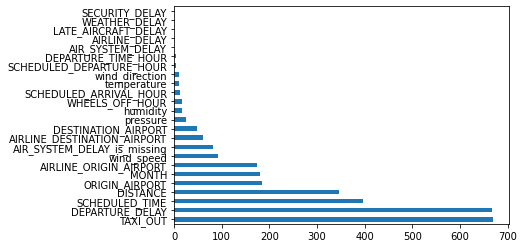

In [0]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

selected_X_train=X_train[cols]
print(selected_X_train)

model = LGBMClassifier()
model.fit(selected_X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=selected_X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [10]:
cols_after_removing_recursive=['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'WHEELS_OFF_HOUR',
       'AIR_SYSTEM_DELAY_is_missing', 'pressure', 'wind_speed']
print(len(cols_after_removing_recursive))

13


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpBernoulliNBModel():
  model = BernoulliNB()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runexpBernoulliNBModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.8190005941527178
Test accuracy score: 0.8898648867656849
Confusion matrix is  [[558097      0]
 [ 88344 155701]]
Classification report is 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93    558097
           1       1.00      0.64      0.78    244045

    accuracy                           0.89    802142
   macro avg       0.93      0.82      0.85    802142
weighted avg       0.90      0.89      0.88    802142





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-validated scores: {'fit_time': array([1.99183226, 1.68242741, 1.68979955, 1.68275881, 1.64707398]), 'score_time': array([0.52345419, 0.51428699, 0.50859761, 0.50866985, 0.51663709]), 'test_accuracy': array([0.89028888, 0.8898479 , 0.88969502, 0.88931169, 0.89015003]), 'test_roc_auc': array([0.81951458, 0.81878912, 0.81853791, 0.8179073 , 0.81928644])}
cross for accuracy [0.89028888 0.8898479  0.88969502 0.88931169 0.89015003]
cross for roc-auc [0.81951458 0.81878912 0.81853791 0.8179073  0.81928644]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLinearSVCModel():
  model = LinearSVC(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runexpLinearSVCModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


predictions are  [1 1 1 ... 0 0 1]
Test ROC AUC score: 0.8532021829072994
Test accuracy score: 0.8392765869384723
Confusion matrix is  [[456319 101778]
 [ 27145 216900]]
Classification report is 
               precision    recall  f1-score   support

           0       0.94      0.82      0.88    558097
           1       0.68      0.89      0.77    244045

    accuracy                           0.84    802142
   macro avg       0.81      0.85      0.82    802142
weighted avg       0.86      0.84      0.84    802142





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: Data

Cross-validated scores: {'fit_time': array([1105.7853179 , 1066.17519736, 1083.73204374, 1068.52170157,
       1077.35190964]), 'score_time': array([0.31255555, 0.29819727, 0.30377221, 0.30368543, 0.35512972]), 'test_accuracy': array([0.91505869, 0.90330643, 0.88857932, 0.90523227, 0.90484427]), 'test_roc_auc': array([0.87770274, 0.85350383, 0.81671113, 0.84768683, 0.86107398])}
cross for accuracy [0.91505869 0.90330643 0.88857932 0.90523227 0.90484427]
cross for roc-auc [0.87770274 0.85350383 0.81671113 0.84768683 0.86107398]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLGBMClassifierModel():
  model = LGBMClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runexpLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.8845391049674239
Test accuracy score: 0.918338648269259
Confusion matrix is  [[541839  16258]
 [ 49246 194799]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94    558097
           1       0.92      0.80      0.86    244045

    accuracy                           0.92    802142
   macro avg       0.92      0.88      0.90    802142
weighted avg       0.92      0.92      0.92    802142





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([25.23069263, 24.96907282, 24.75366282, 24.65447116, 24.66877818]), 'score_time': array([1.90155363, 1.8838675 , 1.89056301, 1.91990399, 1.86559558]), 'test_accuracy': array([0.92016817, 0.91927841, 0.91990314, 0.91903676, 0.92039866]), 'test_roc_auc': array([0.88350887, 0.88232963, 0.88296908, 0.88171276, 0.88378426])}
cross for accuracy [0.92016817 0.91927841 0.91990314 0.91903676 0.92039866]
cross for roc-auc [0.88350887 0.88232963 0.88296908 0.88171276 0.88378426]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpDecisionTreeModel():
  tree = DecisionTreeClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  tree.fit(sel_X_train, Y_train)
  pred=tree.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(tree,X,y)

runexpDecisionTreeModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.851275491724302
Test accuracy score: 0.870556584744347
Confusion matrix is  [[502579  55518]
 [ 48314 195731]]
Classification report is 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91    558097
           1       0.78      0.80      0.79    244045

    accuracy                           

In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpRandomForestModel():
  forest = RandomForestClassifier(max_features=16,max_depth=25,min_samples_leaf=10,random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  forest.fit(sel_X_train, Y_train)
  pred=forest.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)                                         #91.87
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(forest,X,y)

runexpRandomForestModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.884233096460892
Test accuracy score: 0.9185032076614864
Confusion matrix is  [[542339  15758]
 [ 49614 194431]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94    558097
           1       0.93      0.80      0.86    244045

    accuracy                           0.92    802142
   macro avg       0.92      0.88      0.90    802142
weighted avg       0.92      0.92      0.92    802142





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Cross-validated scores: {'fit_time': array([3403.81328917, 3719.38586807, 3639.58003139, 3608.16589308,
       3486.36436272]), 'score_time': array([21.14107108, 21.52273655, 21.34525776, 21.43328524, 21.51010394]), 'test_accuracy': array([0.92085223, 0.92012453, 0.92050151, 0.91981588, 0.92069784]), 'test_roc_auc': array([0.88378508, 0.88273813, 0.88327615, 0.88206591, 0.88371901])}
cross for accuracy [0.92085223 0.92012453 0.92050151 0.91981588 0.92069784]
cross for roc-auc [0.88378508 0.88273813 0.88327615 0.88206591 0.88371901]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runLogisticRegressionModel():
  lrmodel=LogisticRegression()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  lrmodel.fit(sel_X_train, Y_train)
  pred=lrmodel.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(lrmodel,X,y)
  num_params = len(lrmodel.coef_) + 1
  aic_and_bic(Y_test,pred,num_params)

runLogisticRegressionModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.832182929436141
Test accuracy score: 0.87796923736695
Confusion matrix is  [[529706  28391]
 [ 69495 174550]]
Classification report is 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92    558097
           1       0.86      0.72      0.78    244045

    accuracy                           0.88    802142
   macro avg       0.87      0.83      0.85    802142
weighted avg       0.88      0.88      0.87    802142





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Cross-validated scores: {'fit_time': array([49.19567943, 51.90481377, 49.79476285, 49.16554546, 48.39933252]), 'score_time': array([0.30513763, 0.30113983, 0.29529834, 0.31178641, 0.29704785]), 'test_accuracy': array([0.89242835, 0.89225227, 0.89157738, 0.89162101, 0.89215081]), 'test_roc_auc': array([0.82717889, 0.82827271, 0.82688689, 0.82675504, 0.82686411])}
cross for accuracy [0.89242835 0.89225227 0.89157738 0.89162101 0.89215081]
cross for roc-auc [0.82717889 0.82827271 0.82688689 0.82675504 0.82686411]
[1 1 0 ... 0 0 0]
Number of parameters: 2
AIC: -7048343.865


NameError: ignored

In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runXGBClassifierModel():
  model=XGBClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runXGBClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.8782494601127837
Test accuracy score: 0.9076373011262345
Confusion matrix is  [[532040  26057]
 [ 48031 196014]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93    558097
           1       0.88      0.80      0.84    244045

    accuracy                           0.91    802142
   macro avg       0.90      0.88      0.89    802142
weighted avg       0.91      0.91      0.91    802142





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([358.30549622, 376.62025023, 378.89813113, 353.74644017,
       347.60844684]), 'score_time': array([2.09779072, 2.05529618, 2.09760857, 2.0885725 , 2.3814919 ]), 'test_accuracy': array([0.91282729, 0.91252811, 0.91268068, 0.9119187 , 0.9130718 ]), 'test_roc_auc': array([0.86973411, 0.86934446, 0.86911765, 0.86779913, 0.86949969])}
cross for accuracy [0.91282729 0.91252811 0.91268068 0.9119187  0.9130718 ]
cross for roc-auc [0.86973411 0.86934446 0.86911765 0.86779913 0.86949969]


In [0]:
import numpy as np

sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=175,num_leaves=150,lambda_l1=2,lambda_l2=2,max_depth=100)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.8877866362797967
Test accuracy score: 0.9216335760999923
Confusion matrix is  [[543719  14378]
 [ 48483 195562]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    558097
           1       0.93      0.80      0.86    244045

    accuracy                           0.92    802142
   macro avg       0.92      0.89      0.90    802142
weighted avg       0.92      0.92      0.92    802142





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([37.8203609 , 37.49869943, 37.40242887, 37.41205502, 36.49961042]), 'score_time': array([2.39751124, 2.41896319, 2.457232  , 2.36873388, 2.4288168 ]), 'test_accuracy': array([0.9225663 , 0.92210662, 0.92226076, 0.92152683, 0.92288406]), 'test_roc_auc': array([0.88767932, 0.88700975, 0.88714942, 0.88592903, 0.88815891])}
cross for accuracy [0.9225663  0.92210662 0.92226076 0.92152683 0.92288406]
cross for roc-auc [0.88767932 0.88700975 0.88714942 0.88592903 0.88815891]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=150,num_leaves=150,lambda_l1=5,lambda_l2=5,max_depth=90,bagging_fraction=0.8)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.8881567560626986
Test accuracy score: 0.921773202250973
Confusion matrix is  [[543597  14500]
 [ 48249 195796]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    558097
           1       0.93      0.80      0.86    244045

    accuracy                           0.92    802142
   macro avg       0.92      0.89      0.90    802142
weighted avg       0.92      0.92      0.92    802142





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([37.35544038, 37.51785493, 37.36953092, 37.44501877, 37.41005707]), 'score_time': array([2.4088316 , 2.41800952, 2.40239143, 2.38714266, 2.4321475 ]), 'test_accuracy': array([0.92266291, 0.92173576, 0.9222109 , 0.92150034, 0.92268928]), 'test_roc_auc': array([0.88784547, 0.88665959, 0.88700529, 0.88607463, 0.88802478])}
cross for accuracy [0.92266291 0.92173576 0.9222109  0.92150034 0.92268928]
cross for roc-auc [0.88784547 0.88665959 0.88700529 0.88607463 0.88802478]


In [0]:
import numpy as np

sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(learning_rate=0.2,max_bin=150,num_leaves=250,min_data_in_leaf=300,lambda_l1=4,lambda_l2=4,max_depth=80,bagging_fraction=0.7)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:2406600],sel_X_test])
  y=pd.concat([Y_train[:2406600],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 1 0 ... 0 0 0]
Test ROC AUC score: 0.891201867748537
Test accuracy score: 0.9239025010534294
Confusion matrix is  [[543991  14106]
 [ 46935 197110]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    558097
           1       0.93      0.81      0.87    244045

    accuracy                           0.92    802142
   macro avg       0.93      0.89      0.91    802142
weighted avg       0.92      0.92      0.92    802142





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([42.68389559, 42.08827353, 41.54794574, 41.1907568 , 41.56853223]), 'score_time': array([2.78917003, 2.80365586, 2.74148059, 2.69501591, 2.82870674]), 'test_accuracy': array([0.92470421, 0.92359941, 0.92407456, 0.92345749, 0.92462462]), 'test_roc_auc': array([0.89175527, 0.89028437, 0.8907947 , 0.88968714, 0.8917357 ])}
cross for accuracy [0.92470421 0.92359941 0.92407456 0.92345749 0.92462462]
cross for roc-auc [0.89175527 0.89028437 0.8907947  0.88968714 0.8917357 ]


In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

sel_cols=cols
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(125,150),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.6,0.7),
     'num_leaves':(250,300),#
     'min_data_in_leaf':(300,400),
     'lambda_l1':(1,2),#--6                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.4,0.5)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=-1,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'ba

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

sel_cols=cols
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(150,175),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.7,0.8),
     'num_leaves':(300,350),#
     'min_data_in_leaf':(400,450),#                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.3,0.4)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=-1,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=100,lambda_l1=1)
hyperparameterOptimization(model)

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=100,
                                      num_leaves=31, objective=None,
                                      random_st...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'ba

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

sel_cols=cols
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(175,200),#  -->             #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.8,0.9),#-->
     'num_leaves':(350,400),#-->
     'min_data_in_leaf':(450,500),# -->           #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.2,0.3)#<--
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=-1,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=100,lambda_l1=1)
hyperparameterOptimization(model)

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=100,
                                      num_leaves=31, objective=None,
                                      random_st...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'ba

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

sel_cols=cols
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.2,0.3),
     'lambda_l2':(2,4),     
     'max_depth':(60,80,90)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=-1,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,lambda_l1=1,bagging_fraction=0.2,feature_fraction=0.8,max_bin=175,min_data_in_leaf=450,num_leaves=400)
hyperparameterOptimization(model)

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.6min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.2,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.8,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=175,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=450, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=400,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

sel_cols=cols
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.3,0.4),
     'lambda_l2':(2,3),     
     'max_depth':(50,60)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=-1,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(num_iterations=90,lambda_l1=1,bagging_fraction=0.2,feature_fraction=0.8,max_bin=175,min_data_in_leaf=450,num_leaves=400)
hyperparameterOptimization(model)

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction']
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.2,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=175,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=450, min_split_gain=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      num_iterations=90, num_leaves=400,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {     
     'max_depth':(30,40)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(num_iterations=90,lambda_l1=1,bagging_fraction=0.2,feature_fraction=0.8,max_bin=175,min_data_in_leaf=450,num_leaves=400,lambda_l2=2,learning_rate=0.3)
hyperparameterOptimization(model)

Index(['YEAR', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'DISTANCE', 'AIR_TIME',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'DEPARTURE_TIME_HOUR'],
      dtype='object')
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  2.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=4)]: Done   4 out of   6 | elapsed:  2.8min remaining:  1.4min
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  4.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.2,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split', lambda_l1=1,
                                      lambda_l2=2, learning_rate=0.3,
                                      max_bin=175, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=450, min_split_gain=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      num_iterations=90, num_leaves=400,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
          

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction'] 0.5 0.3036830716473116


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.517079	valid_0's binary_logloss: 0.517079
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.423712	valid_0's binary_logloss: 0.423712
[3]	valid_0's binary_logloss: 0.354425	valid_0's binary_logloss: 0.354425
[4]	valid_0's binary_logloss: 0.310488	valid_0's binary_logloss: 0.310488
[5]	valid_0's binary_logloss: 0.289031	valid_0's binary_logloss: 0.289031
[6]	valid_0's binary_logloss: 0.266048	valid_0's binary_logloss: 0.266048
[7]	valid_0's binary_logloss: 0.250659	valid_0's binary_logloss: 0.250659
[8]	valid_0's binary_logloss: 0.241644	valid_0's binary_logloss: 0.241644
[9]	valid_0's binary_logloss: 0.232987	valid_0's binary_logloss: 0.232987
[10]	valid_0's binary_logloss: 0.228635	valid_0's binary_logloss: 0.228635
[11]	valid_0's binary_logloss: 0.224803	valid_0's binary_logloss: 0.224803
[12]	valid_0's binary_logloss: 0.220191	valid_0's binary_logloss: 0.220191
[13]	valid_0's binary_logloss: 0.2169	valid_0's

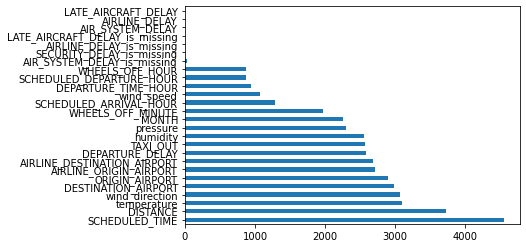

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validated scores: {'fit_time': array([120.9060843 , 121.32442689, 121.21530437, 123.27080607,
       120.76378298]), 'score_time': array([10.43871808, 10.25442433, 10.32744455, 10.35401726, 10.51426005]), 'test_accuracy': array([0.92498937, 0.92419778, 0.92449996, 0.92407144, 0.92477889]), 'test_roc_auc': array([0.89294067, 0.89181751, 0.89213283, 0.89142643, 0.89264656])}
cross for accuracy [0.92498937 0.92419778 0.92449996 0.92407144 0.92477889]
cross for roc-auc [0.89294067 0.89181751 0.89213283 0.89142643 0.89264656]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

sel_cols=cols
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(num_iterations=120,lambda_l1=1,bagging_fraction=0.2,feature_fraction=0.8,max_bin=175,min_data_in_leaf=450,num_leaves=400,lambda_l2=2,learning_rate=0.3,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:2406600],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:2406600],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'WHEELS_OFF_HOUR', 'AIR_SYSTEM_DELAY_is_missing', 'pressure', 'wind_speed', 'temperature', 'wind_direction'] 0.5 0.3036830716473116


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.517083	valid_0's binary_logloss: 0.517083
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.412817	valid_0's binary_logloss: 0.412817
[3]	valid_0's binary_logloss: 0.354701	valid_0's binary_logloss: 0.354701
[4]	valid_0's binary_logloss: 0.315326	valid_0's binary_logloss: 0.315326
[5]	valid_0's binary_logloss: 0.285413	valid_0's binary_logloss: 0.285413
[6]	valid_0's binary_logloss: 0.263822	valid_0's binary_logloss: 0.263822
[7]	valid_0's binary_logloss: 0.249798	valid_0's binary_logloss: 0.249798
[8]	valid_0's binary_logloss: 0.240604	valid_0's binary_logloss: 0.240604
[9]	valid_0's binary_logloss: 0.23349	valid_0's binary_logloss: 0.23349
[10]	valid_0's binary_logloss: 0.227026	valid_0's binary_logloss: 0.227026
[11]	valid_0's binary_logloss: 0.224781	valid_0's binary_logloss: 0.224781
[12]	valid_0's binary_logloss: 0.220812	valid_0's binary_logloss: 0.220812
[13]	valid_0's binary_logloss: 0.217676	valid_0's

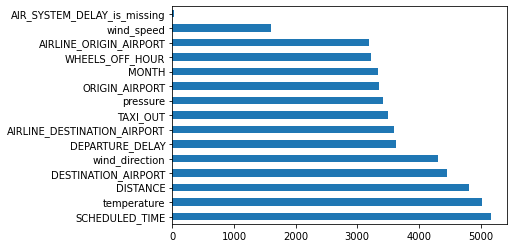

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validated scores: {'fit_time': array([99.33782101, 97.13895464, 99.15243673, 96.56157136, 97.88030076]), 'score_time': array([12.27495646, 12.28809571, 12.42679405, 12.30111551, 12.50325179]), 'test_accuracy': array([0.92516856, 0.92436295, 0.92444854, 0.92423038, 0.92454047]), 'test_roc_auc': array([0.89325858, 0.89236073, 0.89234717, 0.89172545, 0.89256918])}
cross for accuracy [0.92516856 0.92436295 0.92444854 0.92423038 0.92454047]
cross for roc-auc [0.89325858 0.89236073 0.89234717 0.89172545 0.89256918]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

sel_cols=cols_after_removing_recursive+['temperature','wind_direction']
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(num_iterations=150,lambda_l1=1,bagging_fraction=0.2,feature_fraction=0.8,max_bin=175,min_data_in_leaf=450,num_leaves=400,lambda_l2=2,learning_rate=0.3,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:2406600],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:2406600],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'WHEELS_OFF_HOUR', 'AIR_SYSTEM_DELAY_is_missing', 'pressure', 'wind_speed'] 0.5 0.3036830716473116


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.517082	valid_0's binary_logloss: 0.517082
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.432698	valid_0's binary_logloss: 0.432698
[3]	valid_0's binary_logloss: 0.365149	valid_0's binary_logloss: 0.365149
[4]	valid_0's binary_logloss: 0.322596	valid_0's binary_logloss: 0.322596
[5]	valid_0's binary_logloss: 0.290029	valid_0's binary_logloss: 0.290029
[6]	valid_0's binary_logloss: 0.267047	valid_0's binary_logloss: 0.267047
[7]	valid_0's binary_logloss: 0.254355	valid_0's binary_logloss: 0.254355
[8]	valid_0's binary_logloss: 0.244174	valid_0's binary_logloss: 0.244174
[9]	valid_0's binary_logloss: 0.23718	valid_0's binary_logloss: 0.23718
[10]	valid_0's binary_logloss: 0.230465	valid_0's binary_logloss: 0.230465
[11]	valid_0's binary_logloss: 0.225989	valid_0's binary_logloss: 0.225989
[12]	valid_0's binary_logloss: 0.222779	valid_0's binary_logloss: 0.222779
[13]	valid_0's binary_logloss: 0.219108	valid_0's

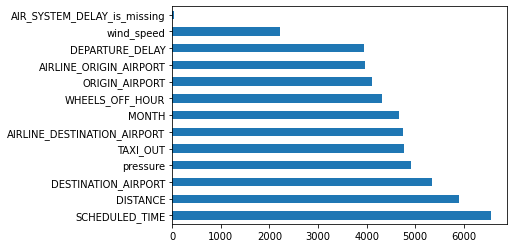

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validated scores: {'fit_time': array([33.7039752 , 33.44732523, 33.93704224, 33.50874758, 33.58323479]), 'score_time': array([4.13270855, 4.11064172, 4.23528075, 4.15545106, 4.30626774]), 'test_accuracy': array([0.92483666, 0.92399832, 0.92429739, 0.92427401, 0.92461527]), 'test_roc_auc': array([0.89289596, 0.8915717 , 0.89196132, 0.89161671, 0.89247849])}
cross for accuracy [0.92483666 0.92399832 0.92429739 0.92427401 0.92461527]
cross for roc-auc [0.89289596 0.8915717  0.89196132 0.89161671 0.89247849]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

sel_cols=cols_after_removing_recursive
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(num_iterations=150,lambda_l1=1,bagging_fraction=0.2,feature_fraction=0.8,max_bin=175,min_data_in_leaf=450,num_leaves=400,lambda_l2=2,learning_rate=0.3,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:2406600],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:2406600],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()